In [20]:
import pandas as pd
jackdf = pd.read_csv('jackdf.csv',index_col=0)

In [24]:
jackdf.head(100) 

,excluded,year,index,value,length,realvalue,imagvalue,excluded_description
0,NONE,2023,0,0j,0.0,0.0,0.0,whole model
1,NONE,2023,1,0j,0.0,0.0,0.0,whole model
2,NONE,2023,2,0j,0.0,0.0,0.0,whole model
3,NONE,2023,3,0j,0.0,0.0,0.0,whole model
4,NONE,2023,4,0j,0.0,0.0,0.0,whole model
...,...,...,...,...,...,...,...,...
95,NONE,2023,95,0j,0.0,0.0,0.0,whole model
96,NONE,2023,96,0j,0.0,0.0,0.0,whole model
97,NONE,2023,97,0j,0.0,0.0,0.0,whole model
98,NONE,2023,98,0j,0.0,0.0,0.0,whole model


In [25]:
jackdf.query('excluded =="NONE" & length > 1 & abs(imagvalue) != 0.0 &  year == 2023')

,excluded,year,index,value,length,realvalue,imagvalue,excluded_description
1314,NONE,2023,1314,(1.0028171880072958+0.020851626011096212j),1.003034,1.002817,0.020852,whole model
1315,NONE,2023,1315,(1.0028171880072958-0.020851626011096212j),1.003034,1.002817,-0.020852,whole model


In [22]:
year_of_interest = 2023

# Using DataFrame.query method to filter for a specific year
filtered_df = jackdf.query('year == @year_of_interest')

# Grouping by 'excluded' and finding the maximum 'length' for each group
largest_length_by_excluded_query = filtered_df.groupby('excluded')['length'].max(2).reset_index().sort_values('length')

# Display the results
print(largest_length_by_excluded_query.head(10))

            excluded    length
30    PAKBXGSRGNFSCD  1.125205
0           CHNEXR05  1.136631
205   PAKNVINDTOTLXN  1.136631
204   PAKNVINDTOTLKN  1.136631
203   PAKNVINDTOTLCN  1.136631
202  PAKNVINDOTHRTXN  1.136631
201  PAKNVINDOTHRTKN  1.136631
200  PAKNVINDOTHRTCN  1.136631
199   PAKNVINDMNGSXN  1.136631
198   PAKNVINDMNGSKN  1.136631


<Axes: ylabel='Frequency'>

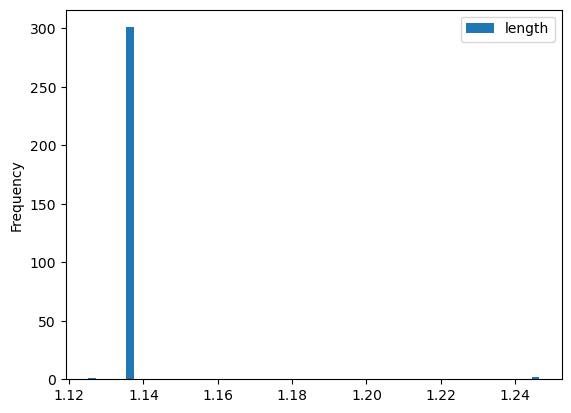

In [23]:
largest_length_by_excluded_query.plot(kind='hist',bins=60)